In [201]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pickle


In [202]:
# 📁 Load dataset
df = pd.read_csv("dataset.csv")

In [203]:
# 💣 Remove leftover 'Price' column
df.drop(columns=["Price"], errors="ignore", inplace=True)


In [204]:
# ✅ Drop rows with missing target
df.dropna(subset=["Resale_Value"], inplace=True)

In [205]:
# 🎯 Define features and target
X = df.drop("Resale_Value", axis=1)
y = df["Resale_Value"]


In [206]:
print(X.columns.tolist())

['Brand', 'Model', 'Car_Age', 'Mileage', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Fuel_Efficiency', 'Previous_Owners', 'Demand_Trend', 'Accident_History', 'Car_Condition_Score', 'Service_History']


In [207]:
# 🧠 Column groups
categorical_features = ["Brand", "Model", "Fuel_Type", "Transmission"]
numerical_features = [col for col in X.columns if col not in categorical_features]

In [208]:
# 🔧 Preprocessing
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

In [209]:
preprocessor = ColumnTransformer([
    ("onehot", categorical_transformer, categorical_features),  # ✅ match app
    ("scaler", numerical_transformer, numerical_features)
])

In [210]:
# 🔁 Pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

In [211]:
# 🎓 Split & Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Model',
                                                   'Fuel_Type',
                                                   'Transmission']),
                                                 ('scaler', StandardScaler(),
                                                  ['Car_Age', 'Mileage',
                                                   'Engine_Size',
                                                   'Fuel_Efficiency',
                                                   'Previous_Owners',
                                                   'Demand_Trend',
                                                   'Accident_History',
                                                   'Car_Condition_Score',
                                                   'Service_History'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [212]:
# Extract feature names from the trained pipeline
onehot = pipeline.named_steps["preprocessor"].named_transformers_["onehot"]
onehot_features = onehot.get_feature_names_out(["Brand", "Model", "Fuel_Type", "Transmission"])
numerical_features = ['Car_Age', 'Mileage', 'Engine_Size', 'Fuel_Efficiency',
                      'Previous_Owners', 'Demand_Trend', 'Accident_History',
                      'Car_Condition_Score', 'Service_History']

final_feature_names = list(onehot_features) + numerical_features

In [213]:
# ✅ Now save to feature_names.pkl
with open("feature_names.pkl", "wb") as f:
    pickle.dump(final_feature_names, f)

In [214]:
# 💾 Save model
with open("car_price_pipeline_updated.pkl", "wb") as f:
    pickle.dump(pipeline, f)


In [215]:
print("✅ Model trained and saved.")

✅ Model trained and saved.


In [216]:
# 📊 FEATURE IMPORTANCE (Table + Chart)
model = pipeline.named_steps['model']
preprocessor = pipeline.named_steps['preprocessor']

In [217]:
# Get feature names
onehot = preprocessor.named_transformers_['onehot']
onehot_features = onehot.get_feature_names_out(categorical_features)
all_feature_names = list(onehot_features) + numerical_features


In [218]:
#Create importance DataFrame
importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

In [219]:
# Show table
print("\n📋 Feature Importances:\n")
print(importance_df)


📋 Feature Importances:

                   Feature  Importance
17           Model_E-Class    0.155527
21                Model_Q5    0.141389
13          Model_5 Series    0.103136
26                Model_XF    0.085354
18          Model_Fortuner    0.073285
20     Model_Innova Crysta    0.054897
6             Brand_Jaguar    0.045854
25            Model_Tucson    0.036684
14          Model_Carnival    0.033479
27            Model_XUV700    0.029769
36                 Mileage    0.026701
38         Fuel_Efficiency    0.026241
39         Previous_Owners    0.024922
8           Brand_Mahindra    0.024461
7                Brand_Kia    0.020841
37             Engine_Size    0.020576
42     Car_Condition_Score    0.016418
35                 Car_Age    0.015293
40            Demand_Trend    0.006449
34     Transmission_Manual    0.003650
31        Fuel_Type_Petrol    0.003542
10            Brand_Nissan    0.003467
30        Fuel_Type_Hybrid    0.003459
28        Fuel_Type_Diesel    0.003237


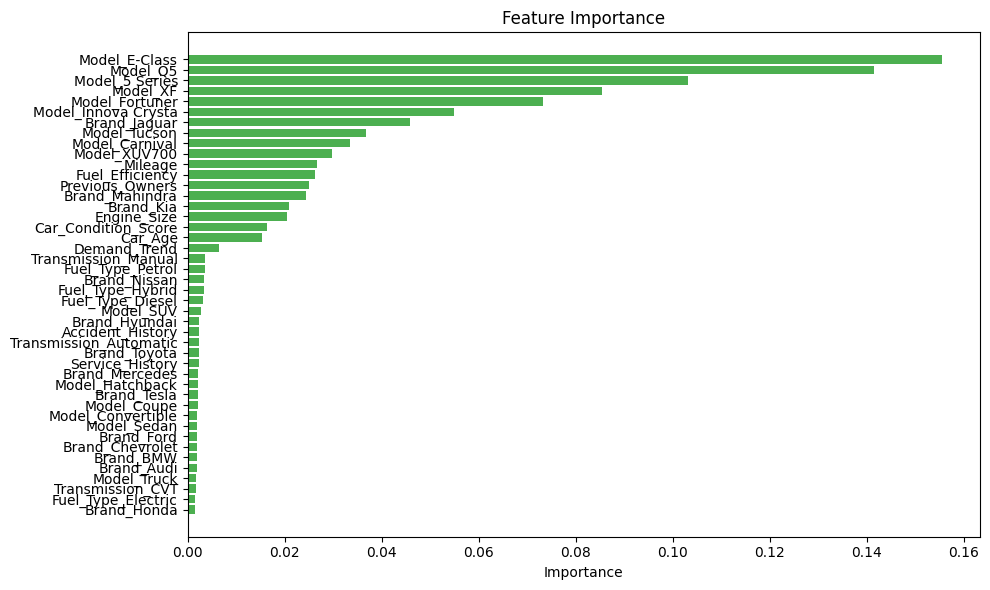

In [220]:
# Show chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="#4CAF50")
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [221]:
# 🧪 Correct test input with only feature columns (no Resale_Value, no Price)
test_input = pd.DataFrame([{
    'Brand': 'BMW',
    'Model': '5 Series',
    'Fuel_Type': 'Petrol',
    'Transmission': 'Automatic',
    'Car_Age': 2,
    'Mileage': 15000,
    'Engine_Size': 2.0,
    'Fuel_Efficiency': 12.5,
    'Previous_Owners': 1,
    'Demand_Trend': 5,
    'Accident_History': 0,
    'Car_Condition_Score': 9.5,
    'Service_History': 1
}])


In [222]:
# 🧠 Align columns with the training set
test_input = test_input[X.columns]  # Only works if 'X' is already defined correctly

In [223]:
# 🔮 Predict
predicted_price = pipeline.predict(test_input)[0]
print(f"\n💰 Predicted Resale Price for BMW 5 Series: ₹{int(predicted_price):,}")


💰 Predicted Resale Price for BMW 5 Series: ₹278,983


In [224]:
test_input = pd.DataFrame([{
    'Brand': 'Mercedes',
    'Model': 'E-Class',
    'Car_Age': 4,
    'Mileage': 25000,
    'Engine_Size': 2.1,
    'Fuel_Type': 'Diesel',
    'Transmission': 'Automatic',
    'Fuel_Efficiency': 11.5,
    'Previous_Owners': 1,
    'Demand_Trend': 4,
    'Accident_History': 0,
    'Car_Condition_Score': 9.3,
    'Service_History': 1
}])[X.columns]

In [225]:
predicted_price = pipeline.predict(test_input)[0]
print(f"💰 Predicted Resale Price: ₹{int(predicted_price):,}")

💰 Predicted Resale Price: ₹336,503
